Assignment No.1:k-nearest neighbors


Before running this block, make sure to upload "data.mat" in the google drive.

In [2]:
#Enter your path of dataset from google drive
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    #  path where your dataset (data.mat) and test image are stored
    path = "/content/drive/MyDrive/Assignment_02/Assignment_02/"
dataset = path + "data.mat"

#Enter path of your test image
test_image=path+"Akash.jpg"                     ## Here Name of the test image
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']   # class labels
images.shape


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [3]:
import numpy as np      # Here are syntax error numpyy
images= np.transpose(images) # Transpose the dataset so that images are correctly oriented

In [4]:
images.shape  # Here are same syntax error like images
im = np.reshape(images, [ 32, 32, 3, -1], order="F") # Reshape the images into 4D array (width, height, channels, number of images)
print("Shape after reshaping:", im.shape)  # After reshape our data look as


Shape after reshaping: (32, 32, 3, 50)


(32, 32, 3)


(32, 32, 3)

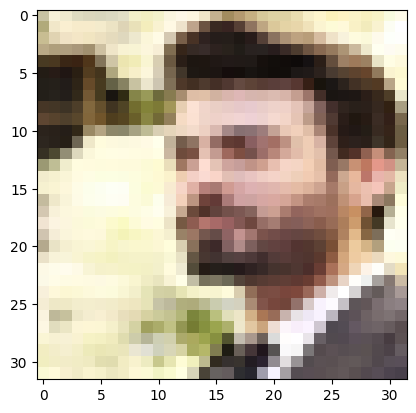

In [5]:
from matplotlib import pyplot as plt


plt.imshow(im[:,:,:,40])     # display image of the indexing nomber 40
print(im[:,:,:,0].shape)
a= im[:,:,:,40]
plt.imshow(a)
a.shape

Now upload a test image into your drive it can be you own image

/tmp/ipython-input-3110606150.py:1: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


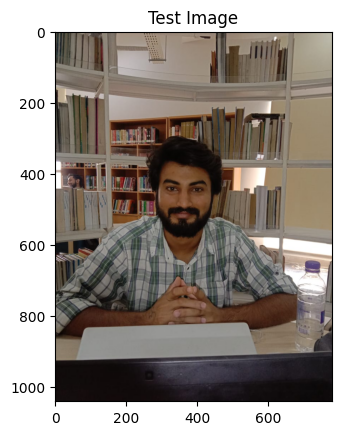

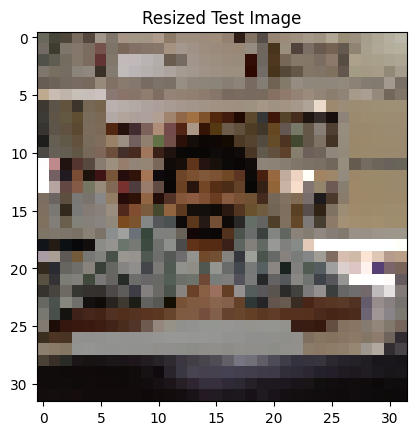

Shape of final reshaped test image: (3072,)


In [6]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray


for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")


####### Read your image here #######

import os
os.chdir("/content/drive/MyDrive/Assignment_02/Assignment_02/")  # go to folder where test image is stored
test = plt.imread('Akash.jpg')              #Read the test image here it is Akash.jpg
plt.title("Test Image")
plt.imshow(test)
plt.show()
############################



####### Resize your image #######

test2 = cv2.resize(test, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)    #c are same syntax error as cv2
plt.title("Resized Test Image")
plt.imshow(test2)
plt.show()
##############################


#Reshape your image as we reshape the image of dataset
test3 = np.reshape(test2,[-1], order="F") #  Flattens the resized test image into a single 1D vector
# it IS  necessary to convert the 2D/3D image into a 1D vector for distance comparison
print("Shape of final reshaped test image:", test3.shape)


In [7]:
############### Calculate Eucleadian distance ###############
test3 = test3 / 255.0                    # Normalize the single test image (test3)
im = im / 255.0                          # Normalize all training images (im)
dist=np.zeros((1,im.shape[3]))           # Initialize a 1xN NumPy array to store distances

for i in range(49):                      # Loop through each of the 49 training images.
  G = im[:,:,:,i]                        # Extract the i-th  training image from the 4D array (im)
  G = np.reshape(G,[-1], order="F")      # Flatten the image 'G' into a 1D vector
  temp = test3 - G                        # Calculate the difference vector between test image and the current training image

 # Calculate the squared Euclidean distance
  dist[0,i]= np.sum(np.dot(temp.T, temp))
dist
##############################

array([[299.03904652, 400.50186851, 239.71312572, 402.21178008,
        248.62445213, 674.07952326, 371.93788543, 458.30843522,
        432.17276432, 264.80764321, 389.16333718, 264.02686659,
        363.28399846, 278.50745098, 442.75629373, 534.9026682 ,
        538.18488274, 312.75291042, 329.60850442, 256.68732026,
        216.27913879, 451.47663206, 584.27700115, 294.60918108,
        592.47681661, 445.90322184, 362.47077278, 345.02723568,
        297.73176471, 382.02572857, 383.92659746, 353.82289889,
        296.47575548, 412.98366782, 272.71338716, 357.95040369,
        607.09314879, 409.43543253, 319.90429835, 292.88901192,
        586.44146098, 287.66154556, 215.60118416, 518.38934256,
        388.08841215, 466.99218762, 394.98652826, 436.42285275,
        296.80696655,   0.        ]])

In this Block you need to fill the code for 1-NN.

Minimum distance:  0.0
Minimum value is at index no  49 of the dataset



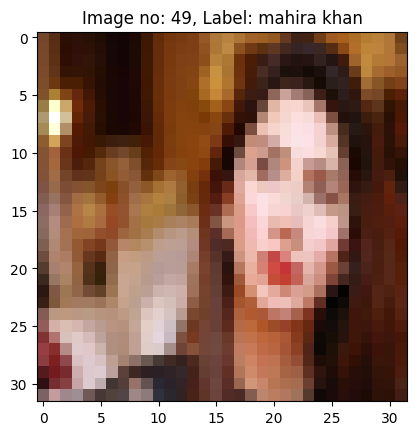

In [8]:

####### 1NN Code #######

N1 = np.min(dist)                                                  # Here are finding the singal  min distance array not max
print("Minimum distance: ", N1)
pos1 = np.where(dist==N1)                                          # Here we are the compare the dist to N1 and assign
pos1 = pos1[1][0]                                                  # Extract the index of the closest training image
print("Minimum value is at index no ", str(pos1), "of the dataset\n")

plt.title("Image no: " + str(pos1) + ", Label: " + str(label[pos1][0][0]))
plt.imshow(im[:,:,:,pos1])    # Display the 1-NN training image found at the index 'pos1' from the training dataset
plt.show()                    # Show the ploted image
##############################


3 NN Code


1 Minimum distance:  592.4768166089964
2 Minimum distance:  607.0931487889272
3 Minimum distance:  674.0795232602845


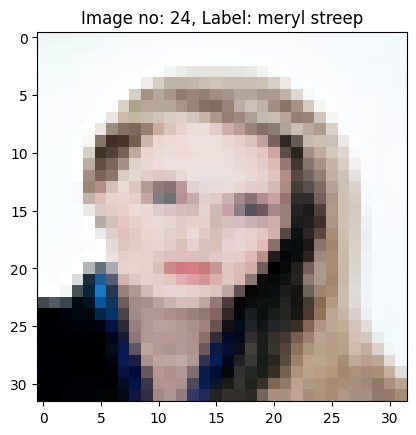

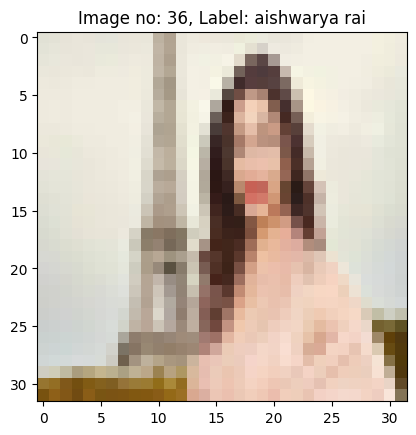

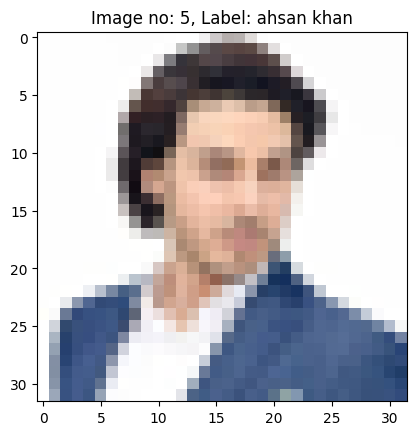


As per majority voting scheme for k=3, test image mostly resembles:  meryl streep


In [9]:
###### 3NN Code #######

sort_dist=np.sort(dist)  # Sort the array of distances in ascending order
N3 = sort_dist[0,-3:]
pos3 = [[] for _ in range(3)]  # Initialize a list of lists to hold the original indices of the 3 nearest neighbors

for i in range(3): # Loop three times to find the index for each of the 3 minimum distances
  print(i+1,"Minimum distance: ",N3[i]) # Here are the printing the above finded index
  pos3[i] = np.where(dist==N3[i])     # Find the index in the  distance array (dist) that match the i-th minimum distance

pos3=[pos3[i][1][0] for i in range(3)] # Extract the column index of the 3 nearest neighbors

for i in range (3):   # Loop through the inex of the 3 nearest neighbors to show  them
  plt.title("Image no: " + str(pos3[i]) + ", Label: " + str(label[pos3[i]][0][0]))
  plt.imshow(im[:,:,:,pos3[i]])
  plt.show()

from collections import Counter  # Import the Counter utility for easy majority voting
def knn(pos, k):            # Define the kNN function for majority voting
  nearest_labels = [str(label[i][0]) for i in pos]   # Get the labels for the images at the positions in 'pos' (the k nearest neighbors)
  most_common_label = Counter(nearest_labels).most_common(1)[0][0] # Use Counter to find the label that appears most frequently (majority vote)
  return most_common_label  # Here we are return label with the majority vote

majority_label_3nn = knn(pos3, 3)   # Call the knn function with the 3 nearest neighbor indices (pos3) and k=3.
majority_label_3nn = majority_label_3nn.strip("[]'\"")  # Clean up the returned label string (removes potential list/array notation characters).
print("\nAs per majority voting scheme for k=3, test image mostly resembles: ", majority_label_3nn)

5 NN

1 Minimum distance:  584.2770011534024
2 Minimum distance:  586.4414609765474
3 Minimum distance:  592.4768166089964
4 Minimum distance:  607.0931487889272
5 Minimum distance:  674.0795232602845


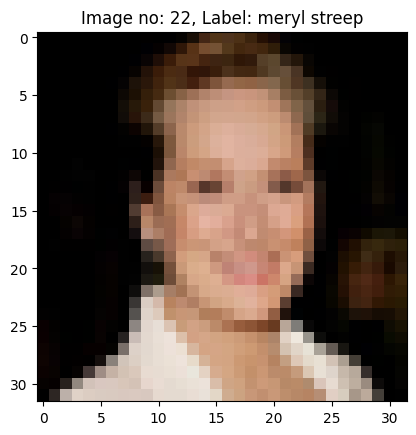

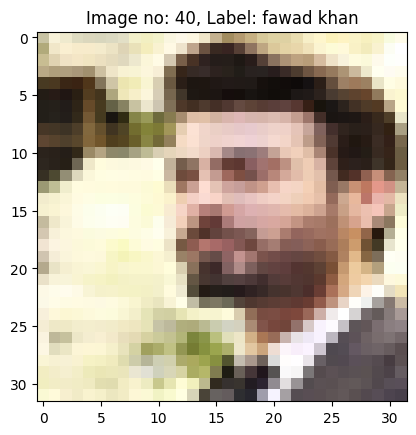

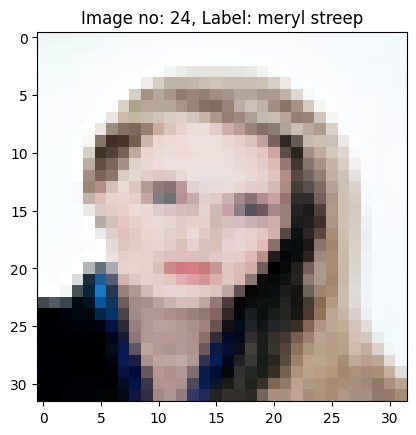

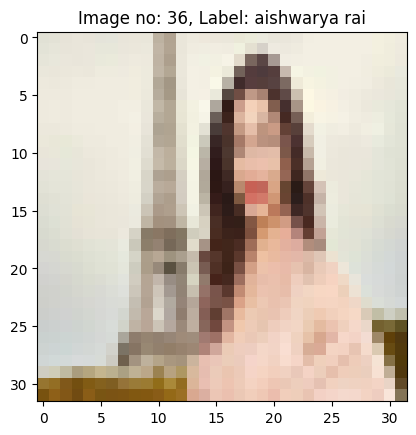

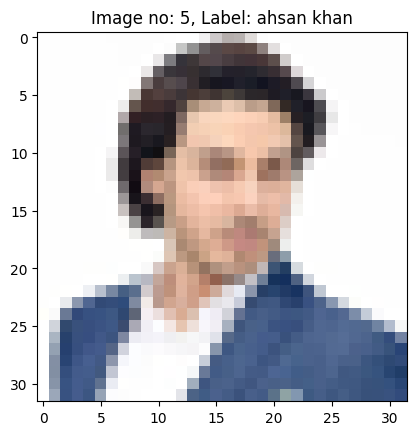


As per majority voting scheme for k=5, test image mostly resembles:  meryl streep


In [12]:

####### 5NN Code #######
# Sort the distance array in ascending order
sort_dist=np.sort(dist)    # Here are the wrirtten the sorted clearly indicates that the numpy module does not have a function named sorted correct name is sort
N5 = sort_dist [0,-5:]

# We are finding 5 neighbors
# So 5NN the range should be the 5 not 4
pos5 = [[] for _ in range (5)]  # Initialize list for 5 neighbor indices]
for i in range(5):
  print(i+1,"Minimum distance: ",N5[i])
  # Find the original index in (dist) that match the i-th minimum distance N5[i].
  pos5[i] = np.where(dist==N5[i])   # Here indicate the assign the value but we camparring here so we use the ==
pos5=[pos5[i][1][0] for i in range(5)]  # Extract the column index for the 5 nearest neighbors

# Loop through the 5 indices to visualize the 5 nearest neighbors
for i in range (5):
  plt.title("Image no: " + str(pos5[i]) + ", Label: " + str(label[pos5[i]][0][0]))
  plt.imshow(im[:,:,:,pos5[i]])
  plt.show()


majority_label_5nn = knn(pos5, 5)   # Use the correct list of 5 neighbor indices for k=5.
majority_label_5nn = majority_label_5nn.strip("[]'\"")
print("\nAs per majority voting scheme for k=5, test image mostly resembles: ", majority_label_5nn)

##############################